In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clinical = pd.read_csv('GSE157859_clinicaldata.csv',index_col=0)

In [8]:
tape = pd.read_csv('COVIDpbmcpred_tape.csv',index_col=0)
scaden = pd.read_csv('COVIDpbmcpred_scaden.csv',index_col=0)
csx = pd.read_csv('COVIDpbmcpred_csx.csv',index_col=0)
music = pd.read_csv('COVIDpbmcpred_music.csv',index_col=0)
rnasieve = pd.read_csv('COVIDpbmcpred_rnasieve.csv',index_col=0)
dwls = pd.read_csv('COVIDpbmcpred_dwls.txt',index_col=0,sep='\t')
bisque = pd.read_csv('COVIDpbmcpred_bisque.csv',index_col=0).T

rnasieve.index = tape.index
dwls.index = tape.index
celltypes = list(tape.columns)
tape.index = clinical.index


alldata = tape.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_tape = alldata[alldata['Stage']=='T']
Tstage_tape['model'] = ['TAPE' for i in range(len(Tstage_tape))]


alldata = scaden.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_scaden = alldata[alldata['Stage']=='T']
Tstage_scaden['model'] = ['Scaden' for i in range(len(Tstage_scaden))]

alldata = csx.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_csx = alldata[alldata['Stage']=='T']
Tstage_csx['model'] = ['CIBERSORTx' for i in range(len(Tstage_csx))]
Tstage_csx = Tstage_csx.drop(index=['lnc_25'])

alldata = rnasieve.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_rnasieve = alldata[alldata['Stage']=='T']
Tstage_rnasieve['model'] = ['RNAsieve' for i in range(len(Tstage_rnasieve))]

alldata = dwls.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_dwls = alldata[alldata['Stage']=='T']
Tstage_dwls['model'] = ['DWLS' for i in range(len(Tstage_dwls))]

alldata = music.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_music = alldata[alldata['Stage']=='T']
Tstage_music['model'] = ['MuSiC' for i in range(len(Tstage_music))]

alldata = bisque.join(clinical)
alldata['LMR'] = (alldata['Bcells']+alldata['CD4Tcells']+alldata['CD8Tcells'])/alldata['Monocytes']
alldata['MLR'] = 1/alldata['LMR']
Tstage_bisque = alldata[alldata['Stage']=='T']
Tstage_bisque['model'] = ['Bisque' for i in range(len(Tstage_bisque))]

Tstage = pd.concat([Tstage_tape,Tstage_scaden,Tstage_rnasieve,Tstage_csx,Tstage_dwls,Tstage_music,Tstage_bisque])

/Users/chan/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/chan/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/chan/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [4]:
# Tstage.to_csv('COVID_pbmc_data.csv')

In [5]:
# colors = sns.color_palette('colorblind',5)
# fig,ax = plt.subplots(figsize=(6,4))
# sns.lineplot(data=Tstage,x='Type',y='MLR',hue='model',ci=50,palette='colorblind')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()
# plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


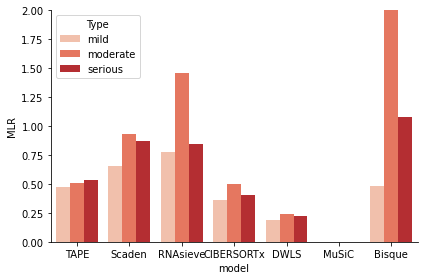

In [10]:
colors = sns.color_palette('colorblind',5)
fig,ax = plt.subplots(figsize=(6,4))
plt.ylim(0,2)
sns.barplot(data=Tstage,x='model',y='MLR',hue='Type',ci=0,
            palette='Reds')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
fig.savefig('MLR.eps',format='eps',dpi=300)
plt.show()